In [14]:
import pandas as pd
import torch
import numpy as np
import os
import sys
import random
import matplotlib.pyplot as plt

DATA_PATH = '../../data/matches-processed/cs2/hetero-graph/'

### Concat single matches

In [20]:
file_names = [
    '100110.pt',
    '100111.pt',
    '100112.pt',
    '100113.pt'
]

lens = 0
concat_list = []

for file in file_names:
    data = torch.load(DATA_PATH + file, weights_only=False)
    lens += len(data)
    concat_list.extend(data)

In [21]:
print(lens)
print(len(concat_list))

32364
32364


In [22]:
torch.save(concat_list, DATA_PATH + '/concat/100110-100113.pt')

### Concat afterplant datasets

In [5]:
file_names = [
    '100000-100009.pt',
    '100010-100019.pt',
    '100020-100029.pt',
    '100030-100039.pt',
    '100040-100049.pt',
    '100050-100059.pt',
    '100060-100069.pt',
    '100070-100079.pt',
    '100080-100089.pt',
    '100090-100099.pt',
    '100100-100109.pt',
    '100110-100113.pt',
]

lens = 0
concat_list = []

for file in file_names:
    data = torch.load(DATA_PATH + 'bomb_planted/' + file, weights_only=False)
    lens += len(data)
    concat_list.extend(data)

In [6]:
print(lens)
print(len(concat_list))

199678
199678


In [7]:
ct_wins = 0
for graph in concat_list:
    ct_wins += graph.y['CT_wins']

print(ct_wins)
print(ct_wins / len(concat_list))

31901.0
0.15976221716964312


In [8]:
torch.save(concat_list, DATA_PATH + '/bomb_planted/afterplant.pt')

### Create bomb planted datasets

In [24]:
file_names = [
    '100000-100009.pt',
    '100010-100019.pt',
    '100020-100029.pt',
    '100030-100039.pt',
    '100040-100049.pt',
    '100050-100059.pt',
    '100060-100069.pt',
    '100070-100079.pt',
    '100080-100089.pt',
    '100090-100099.pt',
    '100100-100109.pt',
    '100110-100113.pt'
]

for file_name in file_names:

    match_graphs = torch.load(DATA_PATH + '/concat/' + file_name, weights_only=False)
    bomb_planted = []

    for graph in match_graphs:
        if graph.y['is_bomb_planted_at_A_site'] == np.float16(1) or graph.y['is_bomb_planted_at_B_site'] == np.float16(1):
            bomb_planted.append(graph)

    torch.save(bomb_planted, DATA_PATH + '/bomb_planted/' + file_name)
    print(f'Saved {file_name}')

Saved 100000-100009.pt
Saved 100010-100019.pt
Saved 100020-100029.pt
Saved 100030-100039.pt
Saved 100040-100049.pt
Saved 100050-100059.pt
Saved 100060-100069.pt
Saved 100070-100079.pt
Saved 100080-100089.pt
Saved 100090-100099.pt
Saved 100100-100109.pt
Saved 100110-100113.pt


In [9]:
bomb_file_names = [
    '100000-100009.pt',
    '100010-100019.pt',
    '100020-100029.pt',
    '100030-100039.pt',
    '100040-100049.pt',
    '100050-100059.pt',
    '100060-100069.pt',
    '100070-100079.pt',
    '100080-100089.pt',
    '100090-100099.pt',
    '100100-100109.pt',
]

for file_name in bomb_file_names:

    match_graphs = torch.load(DATA_PATH + '/bomb_planted/' + file_name, weights_only=False)
    print(f'Graphs in {file_name}: {len(match_graphs)}')

Graphs in 100000-100009.pt: 18199
Graphs in 100010-100019.pt: 14658
Graphs in 100020-100029.pt: 17705
Graphs in 100030-100039.pt: 17674
Graphs in 100040-100049.pt: 19612
Graphs in 100050-100059.pt: 15886
Graphs in 100060-100069.pt: 16954
Graphs in 100070-100079.pt: 19228
Graphs in 100080-100089.pt: 19015
Graphs in 100090-100099.pt: 17290
Graphs in 100100-100109.pt: 15621


### Create training dataset

In [25]:
file_names = [
    '100000-100009.pt',
    '100010-100019.pt',
    '100020-100029.pt',
    '100030-100039.pt',
    '100040-100049.pt',
    '100050-100059.pt',
    '100060-100069.pt',
    '100070-100079.pt',
]

train_data = []

for file in file_names:

    match_graphs = torch.load(DATA_PATH + '/concat/' + file, weights_only=False)
    train_data.extend(match_graphs)
    print(f'Loaded {file}')

torch.save(train_data, DATA_PATH + '/train.pt')
    

Loaded 100000-100009.pt
Loaded 100010-100019.pt
Loaded 100020-100029.pt
Loaded 100030-100039.pt
Loaded 100040-100049.pt
Loaded 100050-100059.pt
Loaded 100060-100069.pt
Loaded 100070-100079.pt


In [26]:
ct_wins = 0
for grapf in train_data:
    if grapf.y['CT_wins'] == np.float16(1):
        ct_wins += 1

print(ct_wins / len(train_data))

0.460989681602123


In [27]:
planted = 0
for grapf in train_data:
    if grapf.y['is_bomb_planted_at_A_site'] == np.float16(1) or grapf.y['is_bomb_planted_at_B_site'] == np.float16(1):
        planted += 1

print(planted / len(train_data))

0.1904578614098638


### Create validation dataset

In [28]:
file_names = [
    '100080-100089.pt',
    '100090-100099.pt',
    '100110-100113.pt',
]

val_data = []

for file in file_names:

    match_graphs = torch.load(DATA_PATH + '/concat/' + file, weights_only=False)
    val_data.extend(match_graphs)
    print(f'Loaded {file}')

torch.save(val_data, DATA_PATH + '/val.pt')
    

Loaded 100080-100089.pt
Loaded 100090-100099.pt
Loaded 100110-100113.pt


In [29]:
ct_wins = 0
for graph in val_data:
    if graph.y['CT_wins'] == np.float16(1):
        ct_wins += 1

print(ct_wins / len(val_data))

0.4753377821166045


### Output variable validation

In [30]:
for file in os.listdir(DATA_PATH + '/bomb_planted/'):

    train_data = torch.load(DATA_PATH + f'/bomb_planted/{file}', weights_only=False)

    ct_wins = 0
    for graph in train_data:
        if graph.y['CT_wins'] == np.float16(1):
            ct_wins += 1

    print(file + ': ' + str(ct_wins / len(train_data)))

100000-100009.pt: 0.1513700155936734
100010-100019.pt: 0.13963410224889725
100020-100029.pt: 0.14991181657848324
100030-100039.pt: 0.15914067585962005
100040-100049.pt: 0.17005404135338345
100050-100059.pt: 0.20787236520321417
100060-100069.pt: 0.12294350842418236
100070-100079.pt: 0.12441417234268574
100080-100089.pt: 0.1735626928791862
100090-100099.pt: 0.18470373270686505
100100-100109.pt: 0.1546796560465232
100110-100113.pt: 0.20327820869310698


### Full-buy rounds proportion

In [10]:
data = torch.load(DATA_PATH + '/concat/100000-100009.pt', weights_only=False)

In [73]:
graph_data = []

for graph in data:
    
    temp_data = [graph.y['numerical_match_id'], graph.y['round'], graph.y['CT_equipment_value'], graph.y['T_equipment_value']]
    if temp_data not in graph_data:
        graph_data.append(temp_data)

ev = pd.DataFrame(graph_data, columns=['numerical_match_id', 'round', 'CT_equipment_value', 'T_equipment_value'])

In [74]:
ev_first = ev.drop_duplicates(subset=['numerical_match_id', 'round'], keep='first')
ev_first.loc[(ev_first['CT_equipment_value'] >= 0.7) & (ev_first['T_equipment_value'] >= 0.7)]

,numerical_match_id,round,CT_equipment_value,T_equipment_value
33,100000.0,0.166667,0.772080,0.743671
64,100000.0,0.250000,0.784900,0.819620
79,100000.0,0.291667,0.827635,0.797468
109,100000.0,0.375000,0.737892,0.748418
136,100000.0,0.458333,0.725071,0.806962
...,...,...,...,...
2884,100009.0,0.708333,0.823362,0.806962
2895,100009.0,0.750000,0.706553,0.806962
2913,100009.0,0.791667,0.849003,0.806962
2946,100009.0,0.875000,0.880342,0.759494


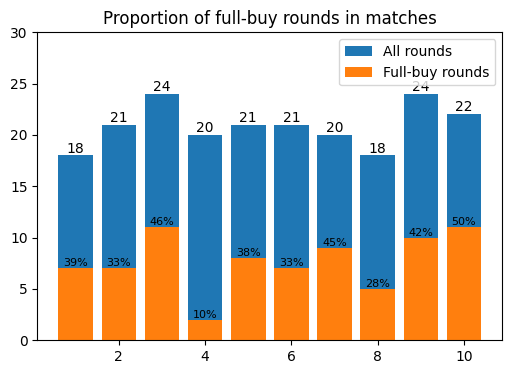

In [69]:
round_nums = ev_first.groupby('numerical_match_id').size().tolist()
full_buy_round_nums = ev_first.loc[(ev_first['CT_equipment_value'] >= 0.7) & (ev_first['T_equipment_value'] >= 0.7)].groupby('numerical_match_id').size().tolist()
prop_fb_rounds = [full_buy_round_nums[i] / round_nums[i] for i in range(len(round_nums))]
match_ids = list(range(1, len(round_nums) + 1))

fig = plt.figure(figsize=(6, 4))

# Oszlop diagramok rajzolása
bar_all = plt.bar(match_ids, round_nums, label='All rounds')
bar_full_buy = plt.bar(match_ids, full_buy_round_nums, label='Full-buy rounds')

# Annotáció hozzáadása az 'All rounds' oszlopok tetejére
plt.bar_label(bar_all, fmt='%.0f')  # 'All rounds' annotációk

# Annotáció hozzáadása a 'Full-buy rounds' oszlopok tetejére (arány kiszámítása)
for i, bar in enumerate(bar_full_buy):
    full_buy_value = full_buy_round_nums[i]
    all_round_value = round_nums[i]
    
    # Arány kiszámítása, ha all_round_value nem 0
    if all_round_value != 0:
        ratio = (full_buy_value / all_round_value) * 100
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{ratio:.0f}%', ha='center', va='bottom', fontdict={'fontsize': 8})
    else:
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(), 'N/A', ha='center', va='bottom')

# Grafikon cím és legenda
plt.title('Proportion of full-buy rounds in matches')
plt.ylim(0, 30)
plt.legend()

# Megjelenítés
plt.show()

In [82]:
prop = (39 + 33 + 46 + 10 + 38 + 33 + 45 + 28 + 42 + 50) / 10
print('Average number of rounds: ' + str(np.mean(round_nums)))
print('Full-buy rounds: ' + str(prop) + '%')
print('Full-buy ratio: ' + str(prop/100 * np.mean(round_nums)) + ' rounds')

Average number of rounds: 20.9
Full-buy rounds: 36.4%
Full-buy ratio: 7.6076 rounds


About 1/3rd of the rounds are full-buy (36.4%). In these rounds, in the first 15-20 seconds (approximately), it is impossible to predit the outcome of the round, as the teams are usually doing default strategies, taking map control and trying to get some information about the opponents positions. This means that the first 20 x 4 (20 seconds, 4 snapshots in each) = 80 snapshots in these rounds are (in most cases, approximately) impossible to predict the winner from. The average number of rounds in a match is 20.9 (~21), out of these, around 7.6 (~7.5) are full-buy rounds. The number of matches used in the training set is 80, meaning 80 * 7.5 * 80 (number of matches * average number of fullbuy rounds * first 20 seconds of a fullbuy round in snapshots) = **~48.000 snapshots are impossible to predict**. The number of graphs in the training set is 714.000, meaning 48 / 714 = ~7% of the data cannot be predicted correctly to begin with, setting the accuracy score's upper limit for a well-generalizing model to 93%.

### Afterplant dataset splt & distribution

In [15]:
ap = torch.load(DATA_PATH + f'/concat/afterplant.pt', weights_only=False)

In [16]:
train = ap[:round(len(ap) * 0.75)]
val = ap[round(len(ap) * 0.75):]

In [17]:
train_ct_wins = 0
val_ct_wins = 0

for graph in train:
    train_ct_wins += graph.y['CT_wins']
for graph in val:
    val_ct_wins += graph.y['CT_wins']

print('Train CT wins: ' + str(train_ct_wins / len(train)))
print('Val CT wins: ' + str(val_ct_wins / len(val)))

Train CT wins: 0.15563776225644038
Val CT wins: 0.17213541666666668


In [18]:
torch.save(train, DATA_PATH + '/bomb_planted/train.pt')

In [19]:
torch.save(val, DATA_PATH + '/bomb_planted/val.pt')